# Import Packages

In [1]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___Healthy",
               "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
               "Corn_(maize)___Northern_Leaf_Blight","Grape___Black_rot"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
print(class_names)
len(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___Healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot']


7

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():

    datasets = [r'C:\Users\Dastan\OneDrive\Desktop\Kasturi\plantleaf disease-loyola\Train', r'C:\Users\Dastan\OneDrive\Desktop\Kasturi\plantleaf disease-loyola\Test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
# def load_data():

#     ## give proper path danu
#     datasets = [r'C:\\Users\\Dastan\\OneDrive\\Desktop\\danus_project\\plantleaf_disease_loyola\\Train', r'C:\\Users\\Dastan\\OneDrive\\Desktop\\danus_project\\plantleaf_disease_loyola\\Test']

#     output = []

#     # Iterate through training and test sets
#     for dataset in datasets:

#         images = []
#         labels = []

#         print("Loading {}".format(dataset))

#         # Iterate through each folder corresponding to a category
#         for folder in os.listdir(dataset):
#             label = class_names_label[folder]

#             # Iterate through each image in our folder
#             for file in tqdm(os.listdir(os.path.join(dataset, folder))):

#                 # Get the path name of the image
#                 img_path = os.path.join(os.path.join(dataset, folder), file)

#                 # Open and resize the img
#                 image = cv2.imread(img_path)
#                 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#                 image = cv2.resize(image, IMAGE_SIZE)

#                 # Append the image and its corresponding label to the output
#                 images.append(image)
#                 labels.append(label)

#         images = np.array(images, dtype = 'float32')
#         labels = np.array(labels, dtype = 'int32')

#         output.append((images, labels))

#     return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\Dastan\OneDrive\Desktop\Kasturi\plantleaf disease-loyola\Train


100%|██████████| 15/15 [00:00<00:00, 295.52it/s]


Loading C:\Users\Dastan\OneDrive\Desktop\Kasturi\plantleaf disease-loyola\Test


100%|██████████| 15/15 [00:00<00:00, 69.49it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 106
Number of testing examples: 106
Each image is of size: (150, 150)


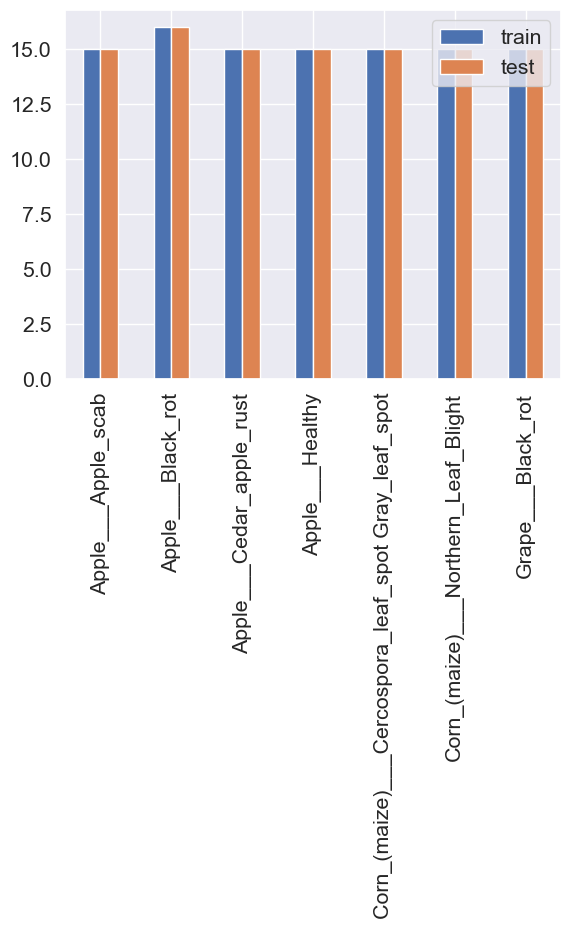

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

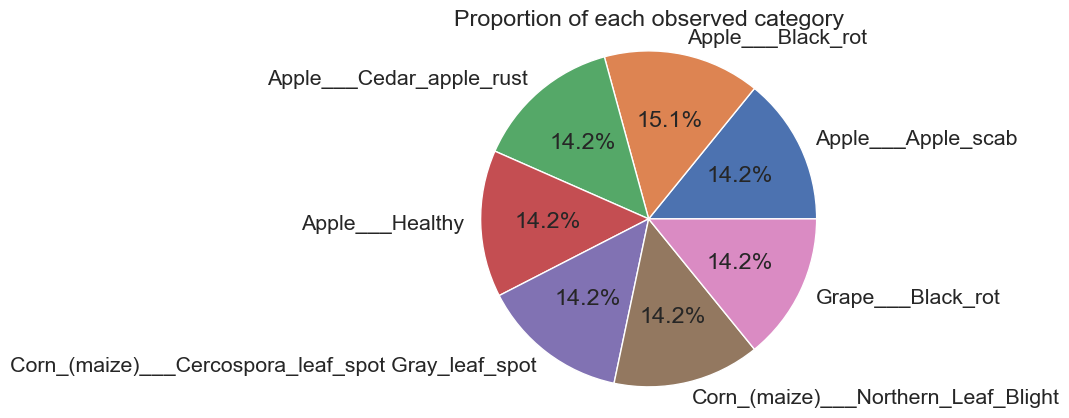

In [9]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0,0,0,0,) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [11]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

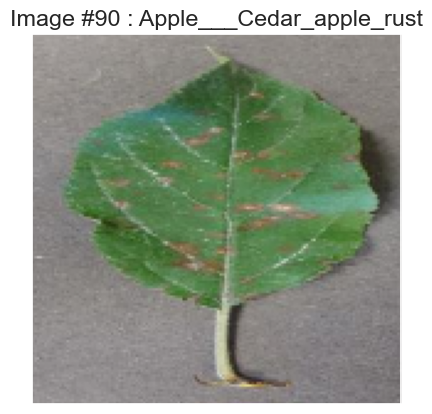

In [12]:
display_random_image(class_names, train_images, train_labels)

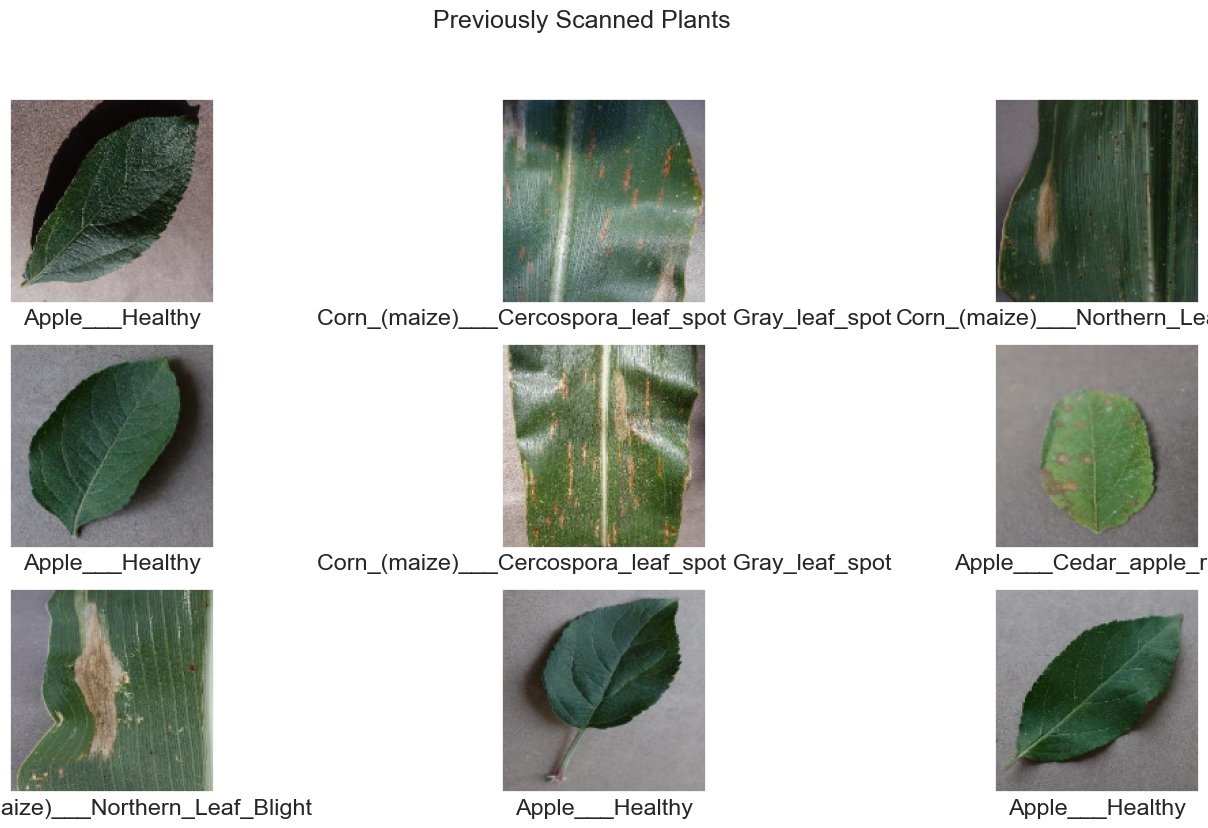

In [50]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels, save_path='examples.jpg'):
    """
    Display 25 images from the images array with its corresponding labels and save the plot as an image.
    """
    fig = plt.figure(figsize=(18, 9))
    fig.suptitle("Previously Scanned Plants", fontsize=18)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.savefig(save_path)
    plt.show()

# Example usage (make sure to replace class_names, train_images, and train_labels with your actual data)
display_examples(class_names, train_images, train_labels)


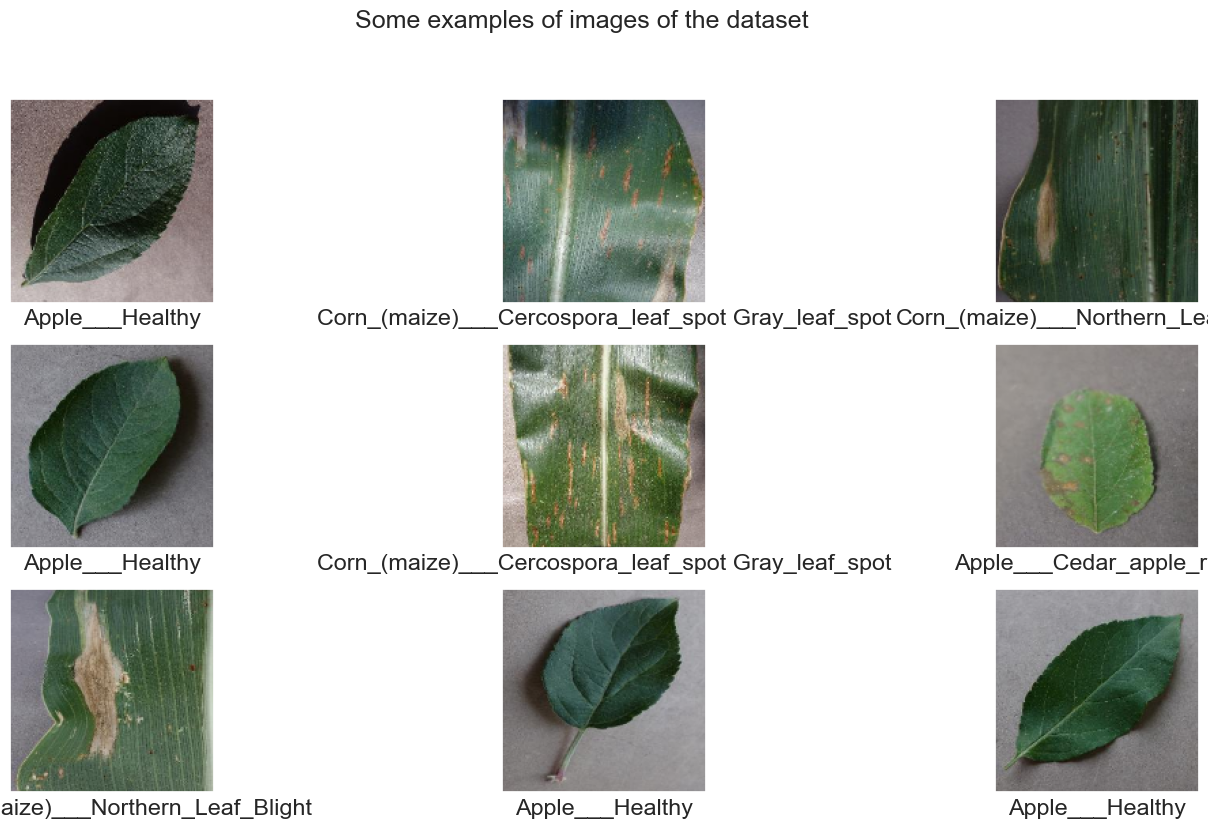

In [48]:
display_examples(class_names, train_images, train_labels)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(9, activation=tf.nn.softmax)
])

c:\Users\Dastan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
#set epochs danu
history = model.fit(train_images, train_labels, batch_size=128, epochs=21, validation_split = 0.2)

Epoch 1/21
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0952 - loss: 2.2268 - val_accuracy: 0.1364 - val_loss: 4.7299
Epoch 2/21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step - accuracy: 0.1548 - loss: 3.9643 - val_accuracy: 0.1364 - val_loss: 4.9645
Epoch 3/21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step - accuracy: 0.1429 - loss: 4.3061 - val_accuracy: 0.0909 - val_loss: 3.5078
Epoch 4/21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step - accuracy: 0.1548 - loss: 3.1974 - val_accuracy: 0.1818 - val_loss: 2.8302
Epoch 5/21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step - accuracy: 0.3095 - loss: 2.7459 - val_accuracy: 0.1818 - val_loss: 2.3835
Epoch 6/21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step - accuracy: 0.3333 - loss: 2.3693 - val_accuracy: 0.3182 - val_loss: 2.0583
Epoch 7/21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step - accuracy: 0.3690 - loss: 2.0077 - val_accuracy: 0.2727 - val_loss: 1.9146
Epoch 8/21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step - accuracy: 0.3929 - loss: 1.7680 - val_accuracy: 0.3182 - val_loss: 1.

In [18]:
test_loss = model.evaluate(test_images, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9367 - loss: 0.3480


In [19]:
#made changes for ssl danu
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(150,150, 3))


In [20]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(25, activation='softmax')(x)
model2 = Model(ResNet_model.input, output)


model2.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 40, 40,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 38, 38,    │          0 │ conv2_block1_0_c

 Total params: 59,656,217 (227.57 MB)

 Trainable params: 6,843,929 (26.11 MB)

 Non-trainable params: 52,812,288 (201.46 MB)

In [21]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model2.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 80s 80s/step - accuracy: 0.0714 - loss: 3.3388 - val_accuracy: 0.1364 - val_loss: 2.1840
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.7619 - loss: 1.3845 - val_accuracy: 0.4545 - val_loss: 1.9503
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.9167 - loss: 0.5684 - val_accuracy: 0.6818 - val_loss: 1.5938
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.9881 - loss: 0.1854 - val_accuracy: 0.6364 - val_loss: 1.8123
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.0521 - val_accuracy: 0.7273 - val_loss: 1.8603


In [23]:
test_loss = model2.evaluate(test_images, test_labels)


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7750 - loss: 0.9294


In [24]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Define the dimensions of your input images
height = 150
width = 150
channels = 3
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define the dimensions of your input images
height = 150
width = 150
channels = 3
num_classes = 25  # Update this to match the number of classes in your dataset

# Define the input tensor
input_tensor = Input(shape=(height, width, channels))

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Flatten the output of VGG19
flatten = Flatten()(base_model.output)

# Add a dense layer with some neurons
output = Dense(num_classes, activation='softmax')(flatten)

# Create a new model
model3 = Model(inputs=base_model.input, outputs=output)

# Set all layers as non-trainable initially
for layer in model3.layers:
    layer.trainable = False

# Make the last few layers trainable
for layer in model3.layers[-19:]:
    layer.trainable = True
    print(f"Layer '{layer.name}' is trainable")

# Checkpoint and EarlyStopping callbacks
checkpoint = ModelCheckpoint("vgg19_disease.h5.keras", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# Compile the model
opt = Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model3.summary()

# Assume train_images and train_labels are already loaded and preprocessed
# Resize images to match the model's input shape
train_images_resized = tf.image.resize(train_images, (150, 150))

# Now, you can use train_images_resized as input to your model
history = model3.fit(train_images_resized, train_labels, batch_size=128, epochs=15, validation_split=0.2,
                     callbacks=[checkpoint, early])


Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_conv4' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_conv4' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_conv4' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten_2' is trainable
Layer 'dense_5' is trainable


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │       204,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,229,209 (77.17 MB)

 Trainable params: 20,116,633 (76.74 MB)

 Non-trainable params: 112,576 (439.75 KB)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50s/step - accuracy: 0.0238 - loss: 3.2999
Epoch 1: val_accuracy improved from -inf to 0.09091, saving model to vgg19_disease.h5.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 58s 58s/step - accuracy: 0.0238 - loss: 3.2999 - val_accuracy: 0.0909 - val_loss: 10.4146
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.1548 - loss: 8.8163
Epoch 2: val_accuracy improved from 0.09091 to 0.13636, saving model to vgg19_disease.h5.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - accuracy: 0.1548 - loss: 8.8163 - val_accuracy: 0.1364 - val_loss: 26.9138
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33s/step - accuracy: 0.1548 - loss: 26.5667
Epoch 3: val_accuracy did not improve from 0.13636
1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step - accuracy: 0.1548 - loss: 26.5667 - val_accuracy: 0.1364 - val_loss: 2.5622
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32s/step - accuracy: 0.1429 - loss: 2.8183
Epoch 4: val_accuracy improved from 0.13636 to 0.27273, saving model to vgg19_disease.h5

In [25]:
test_loss = model3.evaluate(test_images, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.0972 - loss: 2.2831 


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
[3]


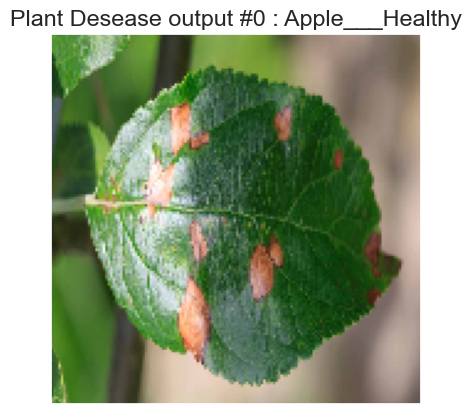

In [26]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Dastan\OneDrive\Desktop\Kasturi\plantleaf disease-loyola\Test\Apple___Black_rot/10.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model2.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Plant Desease output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step


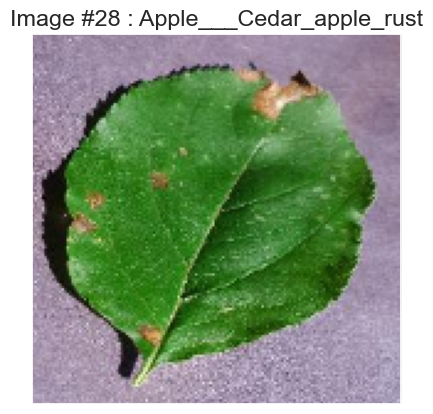

In [27]:
predictions = model2.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

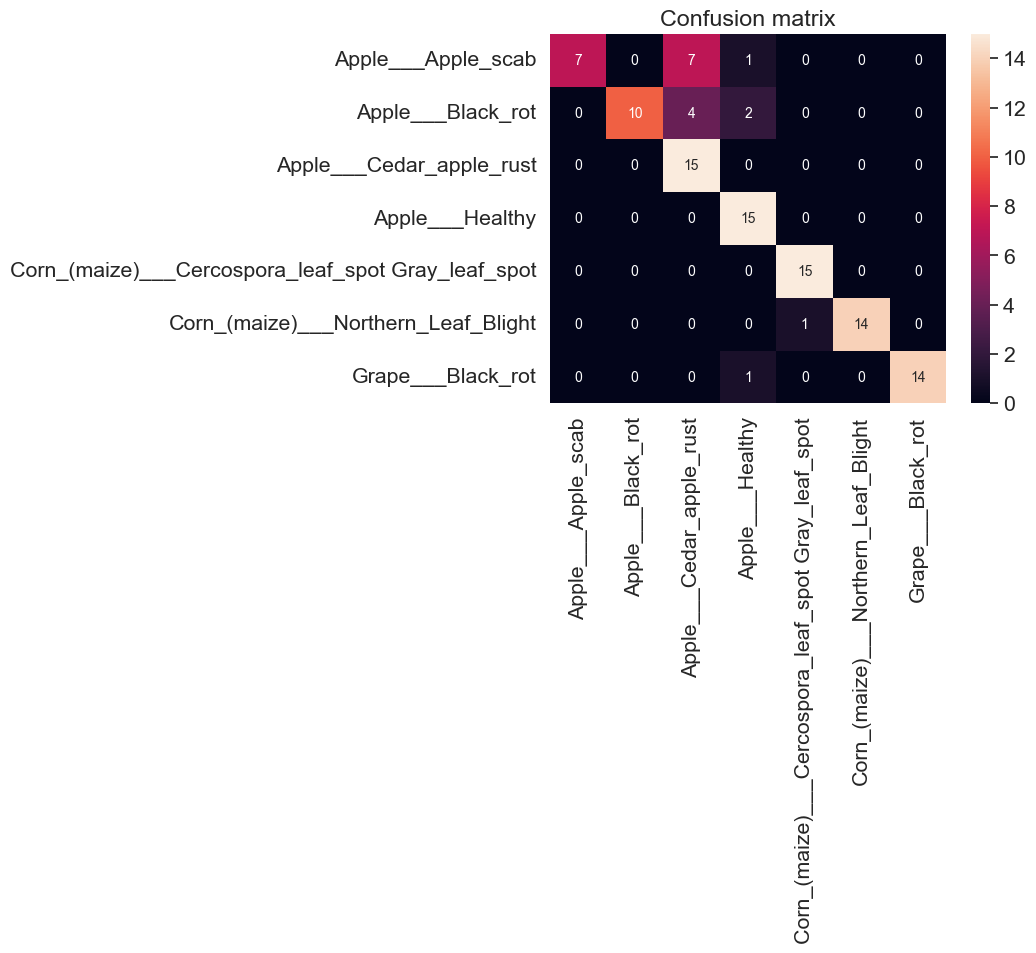

In [28]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [29]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming CM is your confusion matrix, and you have class_names defined

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

Precision: 0.9014948246887174
Recall: 0.8490566037735849
F1 Score: 0.8447707264200834
Custom Accuracy: 0.8490566037735849


In [30]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.47      0.64        15
                                 Apple___Black_rot       1.00      0.62      0.77        16
                          Apple___Cedar_apple_rust       0.58      1.00      0.73        15
                                   Apple___Healthy       0.79      1.00      0.88        15
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      1.00      0.97        15
               Corn_(maize)___Northern_Leaf_Blight       1.00      0.93      0.97        15
                                 Grape___Black_rot       1.00      0.93      0.97        15

                                          accuracy                           0.85       106
                                         macro avg       0.90      0.85      0.85       106
                                      weighted avg    

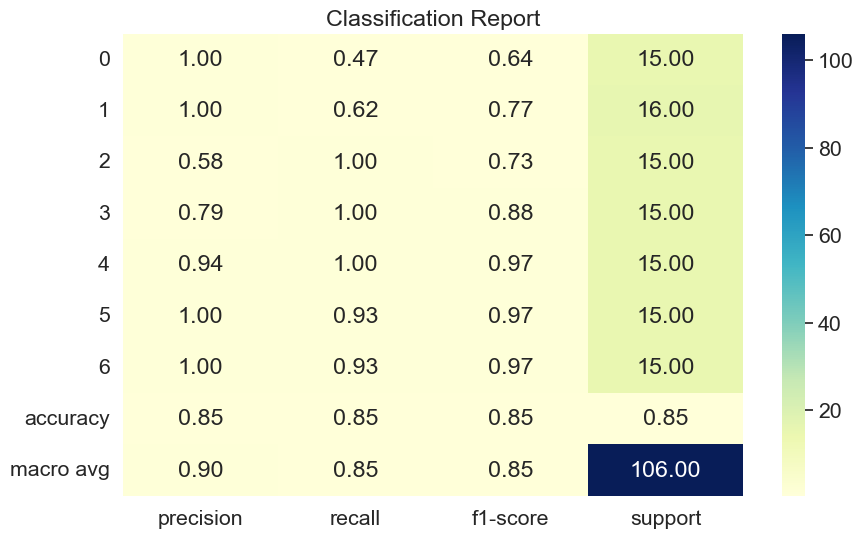

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

In [32]:
model2.save_weights("model_vgg.weights.h5")
print("Saved model to disk")

Saved model to disk


In [33]:
model_json=model2.to_json()
with open("model_vgg.json", "w") as json_file:
    json_file.write(model_json)

In [1]:
import re
import certifi
import os
import spacy
import nltk
import logging
import spacy.cli
from flask import Flask, request, render_template, redirect, session, flash, url_for
from flask import Flask, render_template, request, send_from_directory
from flask_sqlalchemy import SQLAlchemy
import bcrypt
from rake_nltk import Rake
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
import secrets
from datetime import datetime, timedelta
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
import tensorflow as tf
from tkinter import filedialog
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from flask import Flask, render_template, request, send_from_directory

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

os.environ['SSL_CERT_FILE'] = certifi.where()


# Configure logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

# Load English language model for spaCy
nlp = spacy.load("en_core_web_sm")

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///database.db'
db = SQLAlchemy(app)
app.secret_key = secrets.token_hex(16)

UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
#C:\Users\Dastan\OneDrive\Desktop\danus_project\plantleaf_disease_loyola\model_vgg.json
#r'C:\\Users\\Dastan\\OneDrive\\Desktop\\danus_project\\plantleaf_disease_loyola\\Train'
#with open("/Users/naga/Projects/danus_project/plantleaf_disease_loyola/model_vgg.json", 'r') as file:
with open("\\Users\\Dastan\\OneDrive\\Desktop\\danus_project\\plantleaf_disease_loyola\\model_vgg.json", 'r') as file:
    loaded_model_json = file.read()
# json_file = open('model_vgg.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    name = db.Column(db.String(100), nullable=False)
    email = db.Column(db.String(100), unique=True, nullable=False)
    username = db.Column(db.String(100), unique=True, nullable=False)
    password = db.Column(db.String(100), nullable=False)
    is_admin = db.Column(db.Boolean, default=False)
    reset_token = db.Column(db.String(100), nullable=True)
    reset_token_expiry = db.Column(db.DateTime, nullable=True)

    def __init__(self, name, email, username, password, is_admin=False):
        self.name = name
        self.email = email
        self.username = username
        self.password = bcrypt.hashpw(password.encode('utf-8'), bcrypt.gensalt()).decode('utf-8')
        self.is_admin = is_admin

    def check_password(self, password):
        return bcrypt.checkpw(password.encode('utf-8'), self.password.encode('utf-8'))

with app.app_context():
    db.create_all()
    if not User.query.filter_by(email='admin@example.com').first():
        admin = User(name='admin', email='admin@example.com', username='admin', password='Admin@123', is_admin=True)
        db.session.add(admin)
        db.session.commit()

def validate_password(password):
    errors = []
    if len(password) < 8:
        errors.append("Password must be at least 8 characters long")
    if not re.search(r'[A-Z]', password):
        errors.append("Password must contain at least one uppercase letter")
    if not re.search(r'[a-z]', password):
        errors.append("Password must contain at least one lowercase letter")
    if not re.search(r'[0-9]', password):
        errors.append("Password must contain at least one digit")
    if not re.search(r'[!@#$%^&*(),.?\":{}|<>]', password):
        errors.append("Password must contain at least one special character")
    if errors:
        return False, errors
    return True, []

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___Healthy",
               "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
               "Corn_(maize)___Northern_Leaf_Blight","Grape___Black_rot"]
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob


@app.route('/register', methods=['GET', 'POST'])
def register():
    error_messages = None
    if request.method == 'POST':
        logger.debug(request.form)  # Use logging instead of print
        name = request.form['name']
        email = request.form['email']
        username = request.form['username']
        password = request.form['password']
        existing_user = User.query.filter_by(email=email).first()
        if existing_user:
            error_messages = ['Email already exists!']
            return render_template('register.html', error=error_messages)
        is_valid, validation_messages = validate_password(password)
        if not is_valid:
            error_messages = validation_messages
            return render_template('register.html', error=error_messages)
        new_user = User(name=name, email=email, username=username, password=password)
        db.session.add(new_user)
        db.session.commit()
        return redirect('/login')
    return render_template('register.html', error=error_messages)

@app.route('/login', methods=['GET', 'POST'])
def login():
    error = None
    if request.method == 'POST':
        email = request.form['email']
        password = request.form['password']
        user = User.query.filter_by(email=email).first()
        if user and user.check_password(password):
            session['email'] = user.email
            session['is_admin'] = user.is_admin
            return redirect('/home')
        else:
            error = 'Invalid username or password'
    return render_template('login.html', error=error)

@app.route('/admin/login', methods=['GET', 'POST'])
def admin_login():
    error = None
    if request.method == 'POST':
        email = request.form['email']
        password = request.form['password']
        user = User.query.filter_by(email=email, is_admin=True).first()
        if user and user.check_password(password):
            session['email'] = user.email
            session['is_admin'] = user.is_admin
            return redirect('/admin')
        else:
            error = 'Invalid admin credentials'
    return render_template('admin_login.html', error=error)

@app.route('/admin', methods=['GET', 'POST'])
def admin():
    if 'email' not in session or not session.get('is_admin'):
        return redirect('/login')
    
    users = User.query.all()

    if request.method == 'POST':
        delete_user_id = request.form.get('delete_user_id')
        if delete_user_id:
            user_to_delete = User.query.get(delete_user_id)
            if user_to_delete:
                db.session.delete(user_to_delete)
                db.session.commit()
                flash('User deleted successfully', 'success')
            else:
                flash('User not found', 'error')

    return render_template('admin.html', users=users)




@app.route('/reset_password_request', methods=['GET', 'POST'])
def reset_password_request():
    if request.method == 'POST':
        email = request.form.get('email')
        new_password = request.form.get('new_password')
        confirm_password = request.form.get('confirm_password')
        if new_password == confirm_password:
            user = User.query.filter_by(email=email).first()
            if user:
                user.password = bcrypt.hashpw(new_password.encode('utf-8'), bcrypt.gensalt()).decode('utf-8')
                db.session.commit()
                flash('Password reset successfully!', 'success')
                return redirect('/login')
            else:
                flash('User with that email not found.', 'error')
        else:
            flash('Passwords do not match!', 'error')
    return render_template('reset_password_request.html')

@app.route('/reset_password', methods=['GET', 'POST'])
def reset_password():
    if request.method == 'POST':
        new_password = request.form['new_password']
        confirm_password = request.form['confirm_password']
        if new_password == confirm_password:
            hashed_password = bcrypt.hashpw(new_password.encode('utf-8'), bcrypt.gensalt()).decode('utf-8')
            flash('Password reset successfully!', 'success')
            return redirect('/login')
        else:
            flash('Passwords do not match!', 'error')
    return render_template('reset_password.html')

@app.route('/logout')
def logout():
    session.clear()
    return redirect('/login')

@app.route('/change_password', methods=['GET', 'POST'])
def change_password():
    error_message = None
    if 'email' not in session:
        return redirect('/login')
    
    if request.method == 'POST':
        current_password = request.form['current_password']
        new_password = request.form['new_password']
        confirm_password = request.form['confirm_password']
        
        user = User.query.filter_by(email=session['email']).first()
        
        if not user or not user.check_password(current_password):
            error_message = 'Invalid current password'
        elif new_password != confirm_password:
            error_message = 'New password and confirm password do not match'
        else:
            is_valid, validation_messages = validate_password(new_password)
            if not is_valid:
                error_message = validation_messages[0]
            else:
                user.password = bcrypt.hashpw(new_password.encode('utf-8'), bcrypt.gensalt()).decode('utf-8')
                db.session.commit()
                flash('Password changed successfully!', 'success')
                return redirect('/classify')

    return render_template('change_password.html', error=error_message)

# home page

@app.route("/home")
def home():
    return render_template("home.html")

@app.route('/')
def index():
    return render_template('index.html')


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


@app.route('/examples')
def examples():
    # Render the examples.html template
    return render_template('examples.html')


if __name__ == "__main__":

    app.run()


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:10] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:11] "GET /static/images/index.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:15] "GET /examples HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:15] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:15] "GET /static/images/examples.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:17] "GET /home HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:17] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:18] "GET /static/images/peace.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [03/Jul/2024 19:39:31] "GET /classify HTTP/1.1" 200 -
INFO:w

: 